In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

In [312]:
# upload train dataset
from google.colab import files

# Open file picker
uploaded = files.upload()

Saving train_v9rqX0R.csv to train_v9rqX0R (5).csv


In [313]:
# Replace with your uploaded file name
df = pd.read_csv("train_v9rqX0R.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [314]:
# upload test dataset
from google.colab import files

# Open file picker
uploaded = files.upload()

Saving test_AbJTz2l.csv to test_AbJTz2l (5).csv


In [315]:
test = pd.read_csv("test_AbJTz2l.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [317]:
# check null values
df.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [318]:
test.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [319]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Items in Column 'Item_Fat_Content' has variable naming. Regularize the names

In [320]:
# In column 'Item_Fat_Content' - Low Fat is written as 'Low Fat', 'low fat', 'LF'. Regular as 'Regular', 'reg'. Convert them to 'Low Fat' and 'Regular'
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({
    'low fat':'Low Fat',
    'LF':'Low Fat',
    'reg':'Regular'
})

In [321]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({
    'low fat':'Low Fat',
    'LF':'Low Fat',
    'reg':'Regular'
})

Handle missing values in columns "Item_Weight" and "Outlet_Size"

In [322]:
# 1) Handle missing values in column "Outlet_Size"
# Outlet size may depend on outlet stablishment year, outlet type and output location type. So, skipping these rows or just filling "Small" may not bbe efficient
# so matrix comparison using cross table would be useful to undestand their relationship

In [323]:
crosstable = pd.crosstab(
    index=df['Outlet_Size'],
    columns=[df['Outlet_Type'], df['Outlet_Establishment_Year']]
)
crosstable

Outlet_Type               Grocery Store Supermarket Type1                 \
Outlet_Establishment_Year          1985              1987 1997 1999 2004   
Outlet_Size                                                                
High                                  0               932    0    0    0   
Medium                                0                 0    0  930    0   
Small                               528                 0  930    0  930   

Outlet_Type               Supermarket Type2 Supermarket Type3  
Outlet_Establishment_Year              2009              1985  
Outlet_Size                                                    
High                                      0                 0  
Medium                                  928               935  
Small                                     0                 0

In [324]:
# This shows that all grocery stores are "Small". Type2 and Type 3 are "Medium". So, fill in the appropriate values

In [325]:
size_map={
    'Grocery Store':'Small',
    'Supermarket Type2':'Medium',
    'Supermarket Type3':'Medium'
}

df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Type'].map(size_map))
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Type'].map(size_map))

In [326]:
df.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1855
Outlet_Location_Type,0


In [327]:
test.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1236
Outlet_Location_Type,0


In [328]:
# we see that null values in outlet size have reduced

In [329]:
# now do the same process babsed on outlet location type

In [330]:
crosstable = pd.crosstab(
    index=df['Outlet_Size'],
    columns=df['Outlet_Location_Type']
)
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


In [331]:
# Here we see that Tier 2 are "Small"

In [332]:
size_map={
    'Tier 2':'Small'
}

df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Location_Type'].map(size_map))
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Location_Type'].map(size_map))

In [333]:
df.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [334]:
test.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [335]:
# now all outlet size have been filled

In [336]:
# 2) Handle missing values in column "Item_Weight"

In [337]:
# instead of removing null rows, identify the rows with missing values
# categorize them based on the item type, item identifier and fill mean values

In [338]:
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'))
test['Item_Weight']=test['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'))

In [339]:
df.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,4
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [340]:
test.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,1
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [341]:
df['Item_Weight']=df.groupby('Item_Type')['Item_Weight'].transform('mean')
test['Item_Weight']=test.groupby('Item_Type')['Item_Weight'].transform('mean')

In [342]:
df.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [343]:
test.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [344]:
# some items have "Item_Visibility"=0 even though there are item count and sales

In [345]:
zero_visibility_rows = (df['Item_Visibility']==0).sum()
zero_visibility_rows

np.int64(526)

In [346]:
# fill visibility babsed on the visibility of item identifiers

In [347]:
# Train set
df['Item_Visibility'] = df.groupby('Item_Identifier')['Item_Visibility'].transform(
    lambda x: x.replace(0, x.mean())
)

# Test set
test['Item_Visibility'] = test.groupby('Item_Identifier')['Item_Visibility'].transform(
    lambda x: x.replace(0, x.mean())
)

In [348]:
(df['Item_Visibility']==0).sum()

np.int64(0)

In [349]:
(test['Item_Visibility']==0).sum()

np.int64(13)

In [350]:
# still some item have item_visibility=0
test[test['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
732,FDH50,12.607713,Regular,0.0,Canned,185.2266,OUT049,1999,Medium,Tier 1,Supermarket Type1
1634,NCS06,13.272445,Low Fat,0.0,Household,264.7910,OUT017,2007,Small,Tier 2,Supermarket Type1
2201,FDO12,12.572854,Low Fat,0.0,Baking Goods,194.9452,OUT027,1985,Medium,Tier 3,Supermarket Type3
2570,FDB36,12.572854,Regular,0.0,Baking Goods,129.2626,OUT049,1999,Medium,Tier 1,Supermarket Type1
3359,FDO10,12.661897,Regular,0.0,Snack Foods,57.7588,OUT049,1999,Medium,Tier 1,Supermarket Type1
4367,FDK20,13.167042,Regular,0.0,Fruits and Vegetables,121.9072,OUT035,2004,Small,Tier 2,Supermarket Type1
4443,FDY07,13.167042,Low Fat,0.0,Fruits and Vegetables,44.1402,OUT035,2004,Small,Tier 2,Supermarket Type1
4602,FDO12,12.572854,Low Fat,0.0,Baking Goods,194.8452,OUT045,2002,Small,Tier 2,Supermarket Type1
4736,FDY07,13.167042,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT046,1997,Small,Tier 1,Supermarket Type1
4786,NCV06,13.272445,Low Fat,0.0,Household,192.8478,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [351]:
# they can be filled based on item type, item fat content
test['Item_Visibility']=test.groupby(['Item_Type','Item_Fat_Content'])['Item_Visibility'].transform('mean')

In [352]:
test.isnull().sum(axis=0)

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [353]:
# now all zero and numm values in train and test dataset have been filled

In [354]:
# Use one hot encoding to replace strings in columns - Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type
categorical_cols=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

le=LabelEncoder()
for col in categorical_cols:
  df[col]=le.fit_transform(df[col])
  test[col]=le.fit_transform(test[col])

In [355]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,13.379905,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,11.879775,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,12.771212,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,13.236713,1,0.015274,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,13.524780,0,0.008082,9,53.8614,OUT013,1987,0,2,1,994.7052


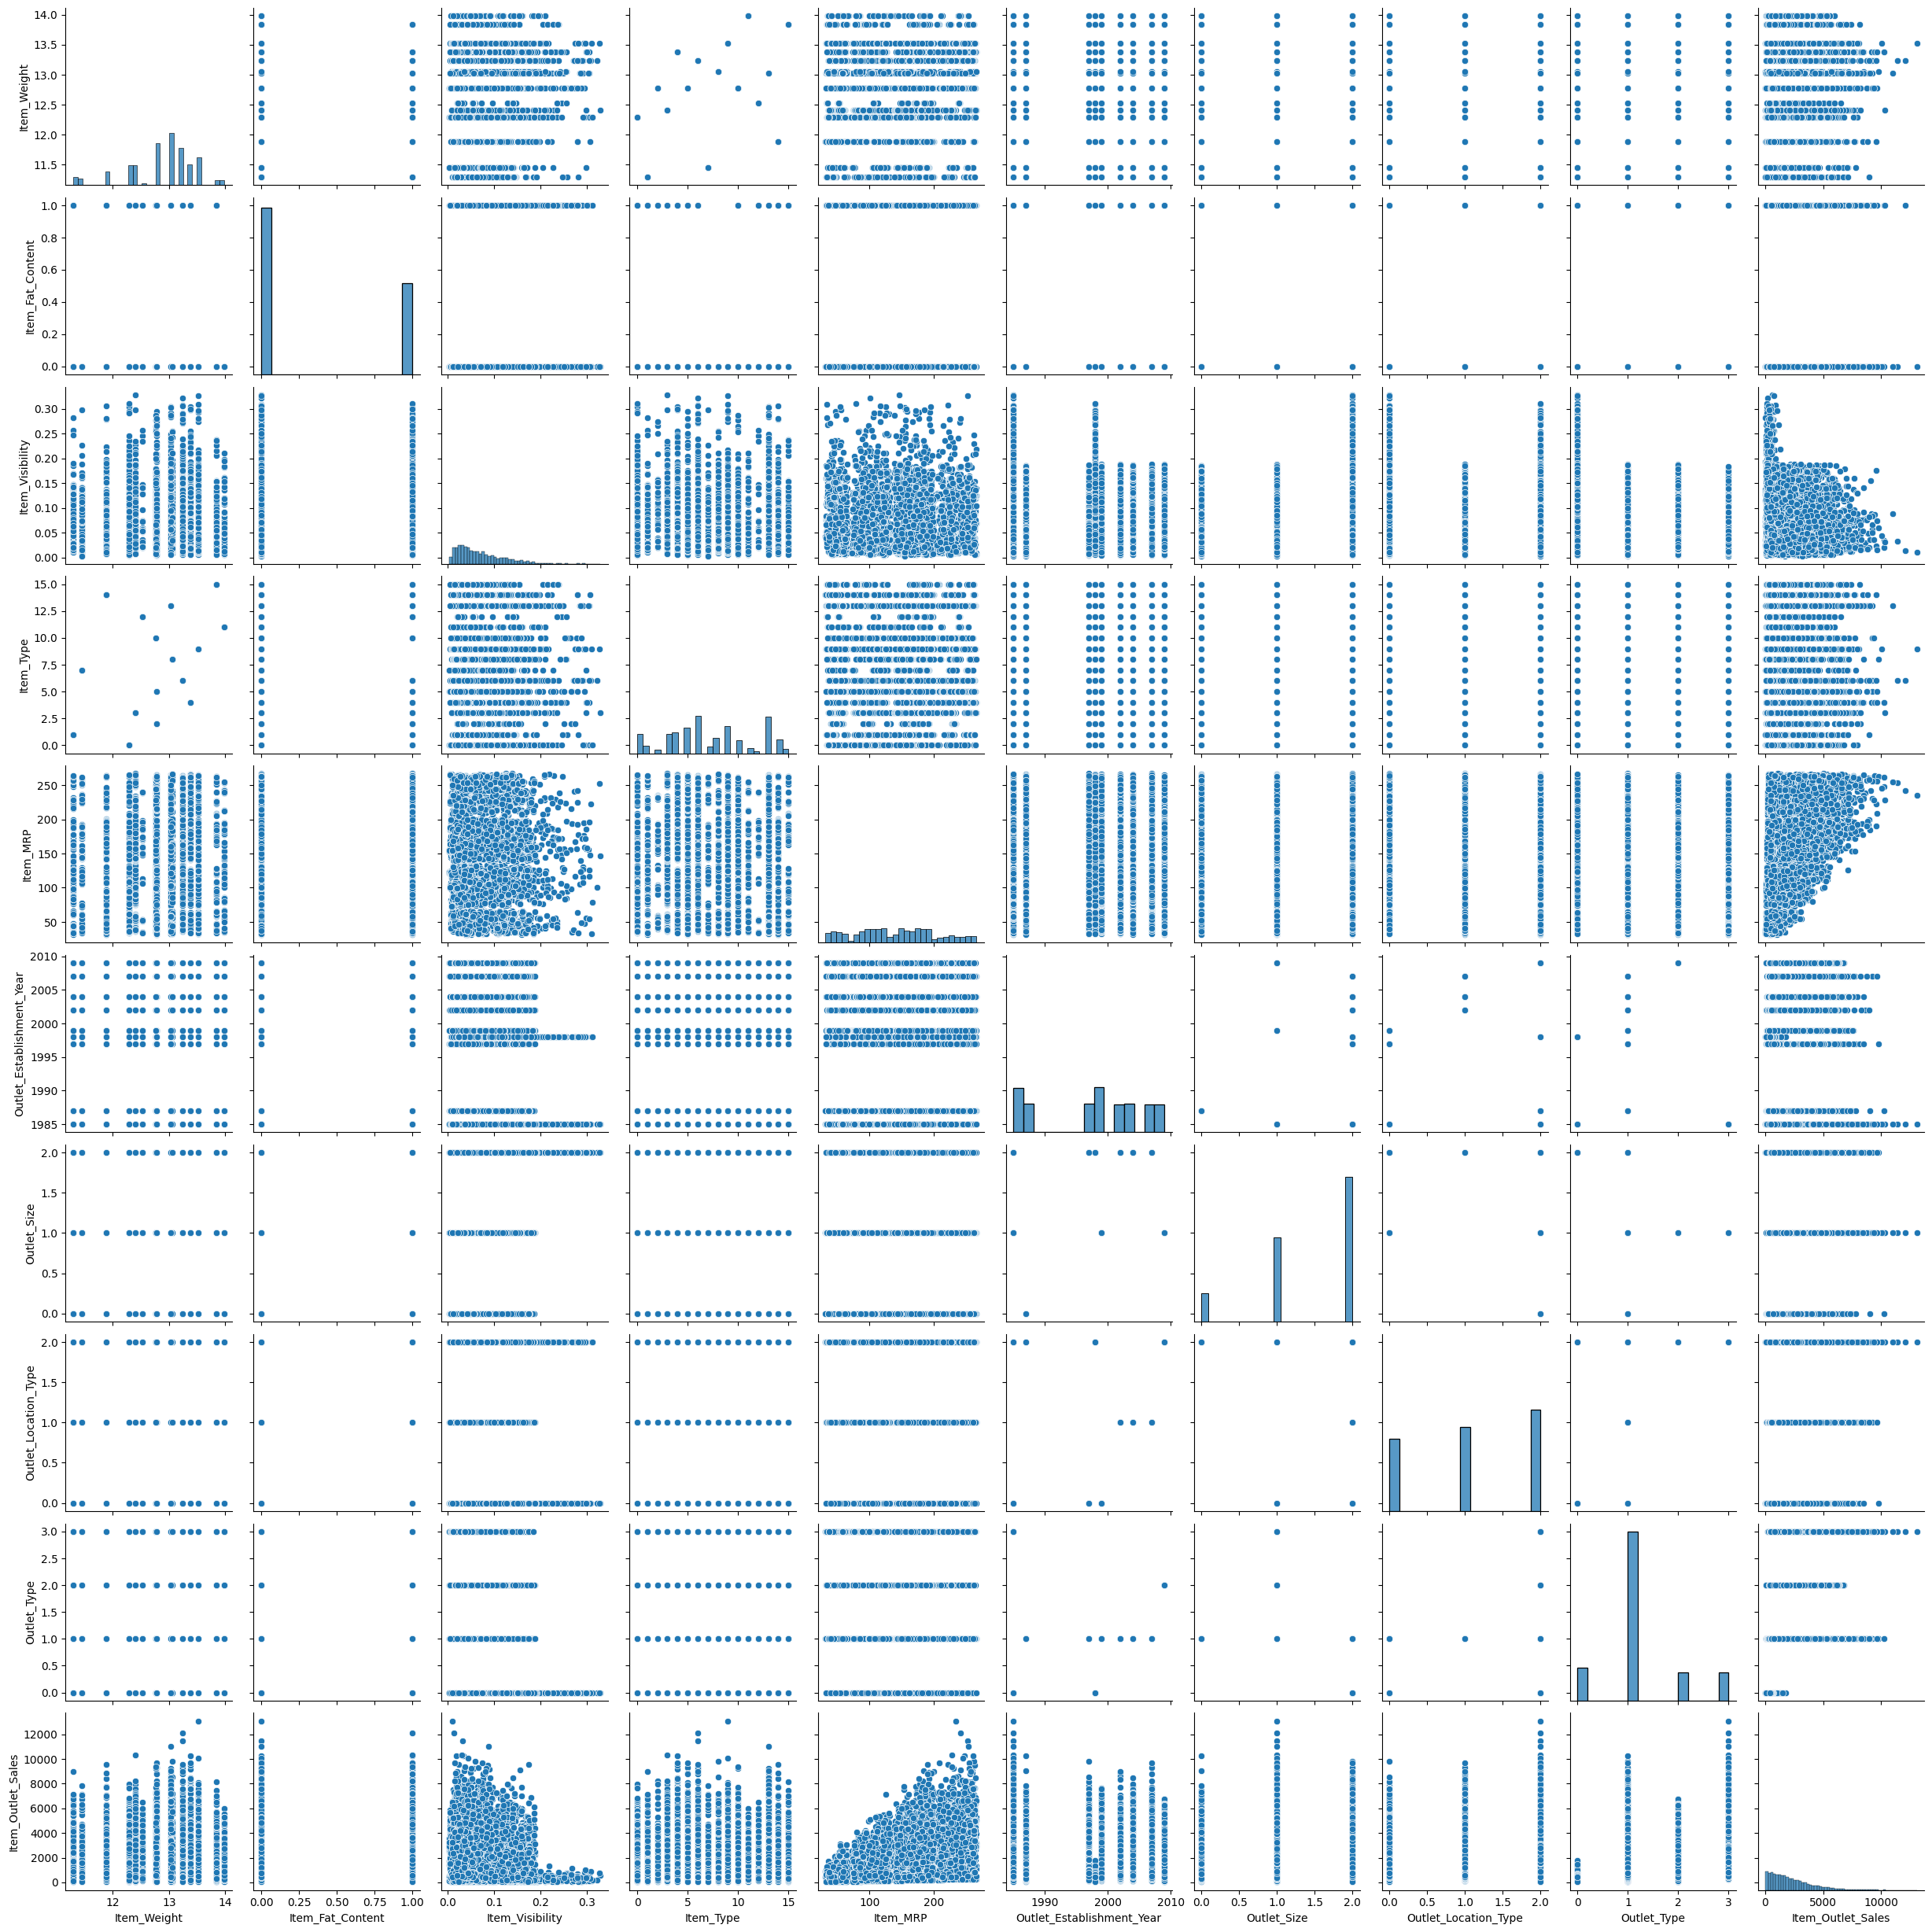

In [356]:
# Do pair plot to see dependencies
sns.pairplot(df)

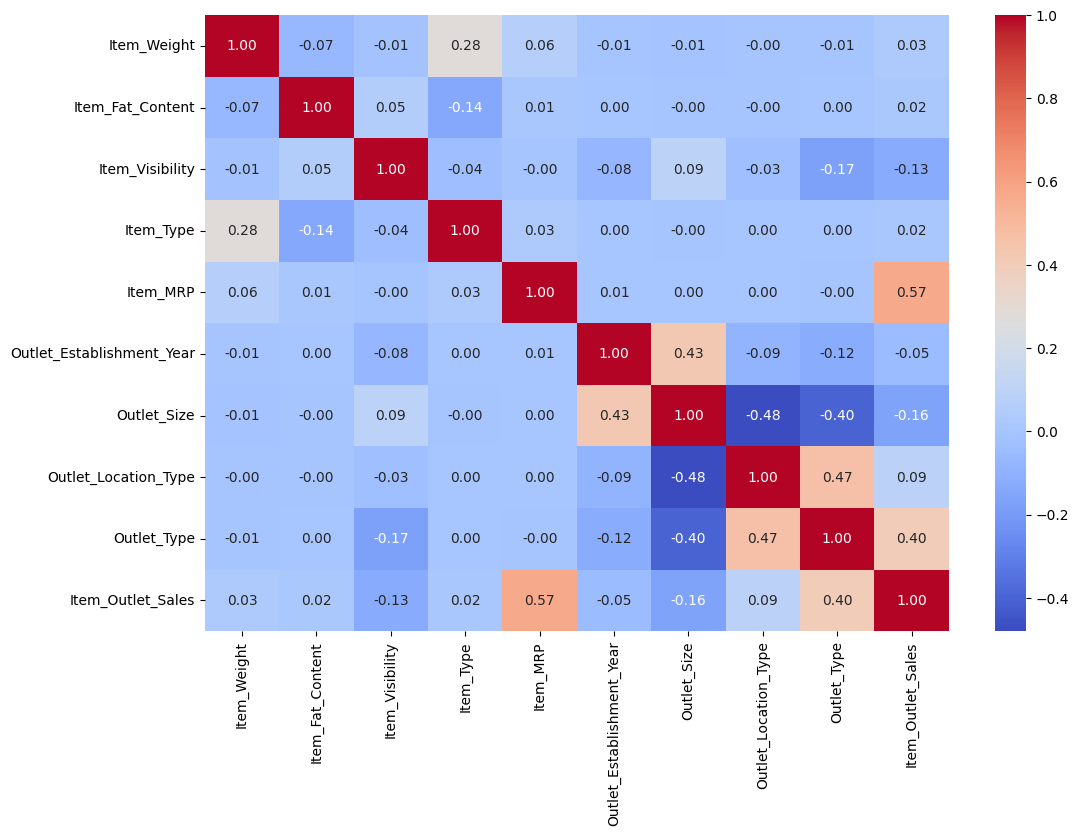

In [357]:
# Calculate correlation matrix
corr = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", cbar=True, annot=True, fmt=".2f")
plt.show()

Relationships observed
1. Sales strongly depends on - Item_MRP, Outlet_Type
2. Sales weakly depends on - Item_Weight, Item_Fat_Content, Item_Type, Outlet_Location_Type

Model training and testing babsed on Train dataset (df)

In [358]:
#X = df[['Item_Weight','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type']]
X=df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=True)
y = df['Item_Outlet_Sales']

In [359]:
print(X.shape)
print(y.shape)

(8523, 9)
(8523,)


In [360]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [361]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6392, 9)
(6392,)
(2131, 9)
(2131,)


Test with various models

In [362]:
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

In [363]:
# ---------- 1. Linear Regression ----------
lin_reg = LinearRegression()
lin_reg.fit(X_train.select_dtypes(include=[np.number]), y_train)  # only numeric for Linear Regression

y_pred_lin = lin_reg.predict(X_test.select_dtypes(include=[np.number]))
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
lin_scores = cross_val_score(lin_reg, X.select_dtypes(include=[np.number]), y, cv=kf, scoring=rmse_scorer)

print(f"Linear Regression RMSE: {rmse_lin:.2f}")
print(f"Linear Regression CV RMSE: {-lin_scores.mean():.2f}")

# ---------- 2. Polynomial Regression with Lasso ----------
poly_lasso = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=0.1, max_iter=10000))
])

poly_lasso.fit(X_train.select_dtypes(include=[np.number]), y_train)

y_pred_poly = poly_lasso.predict(X_test.select_dtypes(include=[np.number]))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
poly_scores = cross_val_score(poly_lasso, X.select_dtypes(include=[np.number]), y, cv=kf, scoring=rmse_scorer)

print(f"Polynomial Regression with Lasso RMSE: {rmse_poly:.2f}")
print(f"Polynomial Regression with Lasso CV RMSE: {-poly_scores.mean():.2f}")

# ---------- 3. Random Forest Regressor ----------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_scores = cross_val_score(rf, X, y, cv=kf, scoring=rmse_scorer)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest CV RMSE: {-rf_scores.mean():.2f}")
"""
# ---------- 4. XGBoost Regressor ----------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_scores = cross_val_score(xgb, X, y, cv=kf, scoring=rmse_scorer)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost CV RMSE: {-xgb_scores.mean():.2f}")
"""

Linear Regression RMSE: 1212.37
Linear Regression CV RMSE: 1206.04


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.745e+09, tolerance: 1.871e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.125e+09, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.995e+09, tolerance: 1.991e

Polynomial Regression with Lasso RMSE: 1098.22
Polynomial Regression with Lasso CV RMSE: 1090.14
Random Forest RMSE: 1139.19
Random Forest CV RMSE: 1132.45


'\n# ---------- 4. XGBoost Regressor ----------\nxgb = XGBRegressor(\n    n_estimators=500,\n    learning_rate=0.05,\n    max_depth=6,\n    subsample=0.8,\n    colsample_bytree=0.8,\n    random_state=42\n)\n\nxgb.fit(X_train, y_train)\n\ny_pred_xgb = xgb.predict(X_test)\nrmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))\nxgb_scores = cross_val_score(xgb, X, y, cv=kf, scoring=rmse_scorer)\n\nprint(f"XGBoost RMSE: {rmse_xgb:.2f}")\nprint(f"XGBoost CV RMSE: {-xgb_scores.mean():.2f}")\n'

Of these XGBoost has good improvement in RMSE due to cross validation

In [364]:
xgb = XGBRegressor(random_state=42, n_estimators=500)

param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [1, 1.5, 2, 3, 5]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=100,  # increase for more exhaustive search
    scoring=rmse_scorer,
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

print("Best params:", random_search.best_params_)

# Make predictions using the tuned model
y_pred_xgb_cv = best_model.predict(X_test)
rmse_xgb_cv = np.sqrt(mean_squared_error(y_test, y_pred_xgb_cv))  # use y_pred_xgb
print(f"Tuned XGBoost RMSE: {rmse:.2f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
# XG boost values are not reducing beyond RMSE of 1081

In [ ]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_xgb_cv})
results.head()

To improve results further introduce,
1. Feature engineering
2. np.log1p on the target "Item_Outlet_Sales"
3. Ensemble models

In [ ]:
# Ensemble model

In [ ]:
from sklearn.ensemble import StackingRegressor

# Base models
base_models = [
    ('lin', LinearRegression()),
    ('poly', Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('lasso', Lasso(alpha=0.1, max_iter=10000))
    ])),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('xgb', best_model)  # tuned XGBoost from RandomizedSearchCV
]

# Stacking ensemble
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=kf,
    n_jobs=-1
)

# Fit stacking model
stack_model.fit(X_train.select_dtypes(include=[np.number]), y_train)

# Predict and calculate RMSE
y_pred_stack = stack_model.predict(X_test.select_dtypes(include=[np.number]))
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"Stacking Ensemble RMSE: {rmse_stack:.2f}")

In [367]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline: scaling + polynomial features + Lasso
poly_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),  # degree will be tuned
    ('lasso', Lasso(max_iter=500))
])

# Grid for degree and alpha tuning
param_grid = {
    'poly__degree': [2, 3, 4],           # try increasing polynomial degree
    'lasso__alpha': [0.001, 0.01, 0.05, 0.1, 0.5]
}

# GridSearchCV
grid = GridSearchCV(poly_lasso, param_grid, cv=kf, scoring=rmse_scorer, n_jobs=-1)
grid.fit(X_train.select_dtypes(include=[np.number]), y_train)

# Best model
best_poly_lasso = grid.best_estimator_
y_pred_poly = best_poly_lasso.predict(X_test.select_dtypes(include=[np.number]))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Best params:", grid.best_params_)
print(f"Polynomial Regression with Lasso RMSE: {rmse_poly:.2f}")

# Cross-validated RMSE
cv_scores = -grid.best_score_  # because scoring was set as negative RMSE
print(f"Polynomial Regression with Lasso CV RMSE: {cv_scores:.2f}")

Best params: {'lasso__alpha': 0.5, 'poly__degree': 3}
Polynomial Regression with Lasso RMSE: 1085.58
Polynomial Regression with Lasso CV RMSE: 1083.27


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.799e+08, tolerance: 1.871e+06
  model = cd_fast.enet_coordinate_descent(
